In [ ]:
#1. Proses Scraping
!pip install google_play_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google_play_scraper import app
import pandas as pd #Pandas menganalisis/mengolah data terstruktur
import numpy as np #berfungsi untuk proses komputasi numerik

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
      'com.bibit.bibitid',
      lang='id',
      sort=Sort.NEWEST,
      count=200,
      filter_score_with=None
)

In [ ]:
data = pd.DataFrame(np.array(result), columns=['review'])

data = data.join(pd.DataFrame(data.pop('review').tolist()))

data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,96352dd2-17f1-4f34-a2f4-82244822dc11,Andalan,https://play-lh.googleusercontent.com/a-/AFdZu...,"Kode reverral biar bisa dapet cashback ""konmchc""",4,0,3.37.1,2022-07-18 02:04:30,None,NaT
1,b89f8c1e-7a5d-4f59-8cd8-92fdded521f3,ismi wahyu riyanti,https://play-lh.googleusercontent.com/a/AItbvm...,Favorit,5,0,3.37.1,2022-07-18 01:46:37,None,NaT
2,58f910f6-e1f8-4e7f-a3f2-c9040a8ac3c0,thom's_ J,https://play-lh.googleusercontent.com/a-/AFdZu...,bibit terbaik,4,0,3.37.1,2022-07-17 21:59:16,None,NaT
3,1580f3fe-b07c-4dfd-9070-1104961019b9,Lili Flower,https://play-lh.googleusercontent.com/a/AItbvm...,26zkn7c pake ini guys,4,0,3.37.1,2022-07-17 11:06:22,None,NaT
4,28f127f8-227e-4e4b-aa58-4fb01d6dbe68,oman irawan,https://play-lh.googleusercontent.com/a-/AFdZu...,"pencairan sangat amat lama, mana lagi butuh.",1,0,None,2022-07-17 10:26:29,"Hai kak, seluruh transaksi di Pasar Modal haru...",2022-07-18 01:26:11


In [ ]:
data_mentah = data[['userName','content']]

In [ ]:
data_scrap = data_mentah[['userName','content']]

In [ ]:
data_scrap.to_csv("data scraping bibit.csv", index = False)

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 7.4 MB/s 


In [ ]:
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df= pd.read_excel('dataset.xlsx', header=0)
df.head() #kita panggil data teratas nya

,userName,content
0,alfian satria,Ribet banget prosesnya .
1,Realmi Phone,Layanan nya jelek Proses jelek lama ber hari h...
2,Veto Barus,"Saya kasih bintang 1 dulu, mohon di tingkatkan..."
3,Muhammad Ihsanudin,"Kecewa dengan adminnya, pelayanannya kurang ba..."
4,Krisna Dwi,"Pencairan dana nya lama, di tingkatkan lagi bu..."


# New section

In [ ]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr
# Buat kolom tambahan untuk data ulasan yang telah dicasefolding  
df['lwr'] = df['content'].apply(clean_lower)
casefolding=pd.DataFrame(df['lwr'])
casefolding

,lwr
0,ribet banget prosesnya .
1,layanan nya jelek proses jelek lama ber hari h...
2,"saya kasih bintang 1 dulu, mohon di tingkatkan..."
3,"kecewa dengan adminnya, pelayanannya kurang ba..."
4,"pencairan dana nya lama, di tingkatkan lagi bu..."
...,...
195,gua udh nyoba aman banget guys nabung disini d...
196,"terbaik dan terpercaya, anda bisa menggunakan ..."
197,"sekarang mau masuk app susah, keterangan ""kone..."
198,apakah pencairan dana harus lebih dari 100k??s...


In [ ]:
#Remove Puncutuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation   
df['clean_punct'] = df['lwr'].apply(clean_punct)
df['clean_punct']

0                               ribet banget prosesnya  
1      layanan nya jelek proses jelek lama ber hari h...
2      saya kasih bintang 1 dulu mohon di tingkatkan ...
3      kecewa dengan adminnya pelayanannya kurang bag...
4      pencairan dana nya lama di tingkatkan lagi bua...
                             ...                        
195    gua udh nyoba aman banget guys nabung disini d...
196    terbaik dan terpercaya anda bisa menggunakan k...
197    sekarang mau masuk app susah keterangan  konek...
198    apakah pencairan dana harus lebih dari 100k  s...
199    proses lama untuk pencairan dana masuk ke reke...
Name: clean_punct, Length: 200, dtype: object

In [ ]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"\d+","", corrected)
    return corrected.strip(" ")
df['clean_number'] = df['clean_punct'].apply(_normalize_whitespace)
df['clean_number']

0                                 ribet banget prosesnya
1      layanan nya jelek proses jelek lama ber hari h...
2      saya kasih bintang  dulu mohon di tingkatkan l...
3      kecewa dengan adminnya pelayanannya kurang bag...
4      pencairan dana nya lama di tingkatkan lagi bua...
                             ...                        
195    gua udh nyoba aman banget guys nabung disini d...
196    terbaik dan terpercaya anda bisa menggunakan k...
197    sekarang mau masuk app susah keterangan  konek...
198    apakah pencairan dana harus lebih dari k  saya...
199    proses lama untuk pencairan dana masuk ke reke...
Name: clean_number, Length: 200, dtype: object

In [ ]:
from nltk.corpus import stopwords
#clean stopwords
stopword = set(stopwords.words('indonesian'))
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text
# Buat kolom tambahan untuk data description yang telah distopwordsremoval   
df['clean_sw'] = df['clean_number'].apply(clean_stopwords)

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_word(text):
  text = ' '.join([stemmer.stem(word) for word in text.split() ])
  return text
# Buat kolom tambahan untuk data description yang telah dilemmatization   

df['desc_clean_stemmersastrawi'] = df['clean_number'].apply(stem_word)
df['desc_clean_stemmersastrawi']

0                                    ribet banget proses
1      layan nya jelek proses jelek lama ber hari har...
2      saya kasih bintang dulu mohon di tingkat lagi ...
3      kecewa dengan adminnya layan kurang bagus di h...
4      cair dana nya lama di tingkat lagi buat cair d...
                             ...                        
195    gua udh nyoba aman banget guys nabung sini dan...
196    baik dan percaya anda bisa guna kode referal a...
197    sekarang mau masuk app susah terang koneksi ka...
198    apakah cair dana harus lebih dari k saya jual ...
199    proses lama untuk cair dana masuk ke rekening ...
Name: desc_clean_stemmersastrawi, Length: 200, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# 3. Tokenization-In this each entry in the corpus will be broken into set of words
df['tokenize'] = df['desc_clean_stemmersastrawi'].apply(word_tokenize)
df['tokenize']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0                                [ribet, banget, proses]
1      [layan, nya, jelek, proses, jelek, lama, ber, ...
2      [saya, kasih, bintang, dulu, mohon, di, tingka...
3      [kecewa, dengan, adminnya, layan, kurang, bagu...
4      [cair, dana, nya, lama, di, tingkat, lagi, bua...
                             ...                        
195    [gua, udh, nyoba, aman, banget, guys, nabung, ...
196    [baik, dan, percaya, anda, bisa, guna, kode, r...
197    [sekarang, mau, masuk, app, susah, terang, kon...
198    [apakah, cair, dana, harus, lebih, dari, k, sa...
199    [proses, lama, untuk, cair, dana, masuk, ke, r...
Name: tokenize, Length: 200, dtype: object

In [ ]:
df.head(200)

In [ ]:
#drop data yang tidak digunakan lagi
df_data = df.drop(columns = ['userName','content','lwr','clean_punct','clean_number','tokenize','clean_sw'])

In [ ]:
df_data.head(200)

In [ ]:
from openpyxl import load_workbook #library untuk menampilkan dokumen
wr = load_workbook(filename = 'dataset_tfidf.xlsx')
sheet_range = wr['Sheet1']

df = pd.DataFrame(sheet_range.values)
df.columns = ['No', 'Ulasan']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline

In [ ]:
df[['Ulasan']] #memanggil / tampil tabel komentar
ulasan = [] #deklarasi variabel komentar pada list
ulasan = df['Ulasan'].values.tolist() #masukan data kedalam list
#komentar #cetak data dalam list

In [ ]:
wr2= load_workbook(filename = 'kamus.xlsx')
sheet_range = wr2['Sheet1']

In [ ]:
df2 = pd.DataFrame(sheet_range.values)
df2.columns = ['positif', 'negatif']
df2

,positif,negatif
0,mudah,sulit
1,mantap,susah
2,keren,rugi
3,bagus,bahaya
4,praktis,ganggu
5,suka,error
6,informatif,lelet
7,aman,boros
8,jamin,bug
9,promo,komplain


In [ ]:
df2[['positif', 'negatif']]

s1 = []
s2 = []

s1 = df2['positif'].values.tolist()
s2 = df2['negatif'].values.tolist()

In [ ]:
hitung = TfidfVectorizer(analyzer='word' , norm=None, vocabulary = (s1), smooth_idf=False)
nilai = hitung.fit_transform(ulasan)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1632: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1


In [ ]:
nilai.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
nilai.toarray()
hitung.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['mudah',
 'mantap',
 'keren',
 'bagus',
 'praktis',
 'suka',
 'informatif',
 'aman',
 'jamin',
 'promo',
 'bantu',
 'butuh',
 'stabil',
 'lancar',
 'semangat',
 'hasil',
 'ikut',
 'tambah',
 'untung',
 'tepat',
 'terima',
 'rutin',
 'terimakasih',
 'senang',
 'ramah',
 'salut',
 'percaya',
 'guna',
 'berkat',
 'cair',
 'bersih',
 'terjamin',
 'gampang']

In [ ]:
df = pd.DataFrame(nilai.toarray(), columns=hitung.get_feature_names())
df["Positif"] = df.sum(axis=1)
df
df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]], axis = 1, inplace = True)
#df.drop(df.rows[0],axis=0, inplace = True)

df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Positif
0,0.000000
1,0.000000
2,3.595255
3,0.000000
4,8.302545
...,...
196,9.205412
197,19.731185
198,7.203932
199,10.785764


In [ ]:
hitung2 = TfidfVectorizer(analyzer='word' , norm=None, vocabulary = (s2), smooth_idf=False)
nilai2 = hitung2.fit_transform(ulasan)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1632: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1


In [ ]:
nilai2.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 5.20469262, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
nilai2.toarray()
hitung2.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['sulit',
 'susah',
 'rugi',
 'bahaya',
 'ganggu',
 'error',
 'lelet',
 'boros',
 'bug',
 'komplain',
 'kecewa',
 'lama',
 'goblog',
 'hancur',
 'seram',
 'buruk',
 'bodoh',
 'hilang',
 'parah',
 'tipu',
 'tolak',
 'kapok',
 'lambat',
 'anjir',
 'masalah',
 'kurang',
 'cacat',
 'hapus',
 'buang',
 'buntung',
 'jebak',
 'batal',
 'akibat']

In [ ]:
df2 = pd.DataFrame(nilai2.toarray(), columns=hitung2.get_feature_names())
df2["Negatif"] = df2.sum(axis=1)
df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]], axis = 1, inplace = True)
#df.drop(df.rows[0],axis=0, inplace = True)

df2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Negatif
0,0.000000
1,0.000000
2,6.517565
3,0.000000
4,14.227783
...,...
196,0.000000
197,0.000000
198,5.204693
199,0.000000


In [ ]:
df1 = pd.concat([df, df2], axis=1)
df1

,Positif,Negatif
0,0.000000,0.000000
1,0.000000,0.000000
2,3.595255,6.517565
3,0.000000,0.000000
4,8.302545,14.227783
...,...,...
196,9.205412,0.000000
197,19.731185,0.000000
198,7.203932,5.204693
199,10.785764,0.000000


In [ ]:
df1['sentimen'] = df1.idxmax(axis=1)
df1

,Positif,Negatif,sentimen
0,0.000000,0.000000,Positif
1,0.000000,0.000000,Positif
2,3.595255,6.517565,Negatif
3,0.000000,0.000000,Positif
4,8.302545,14.227783,Negatif
...,...,...,...
196,9.205412,0.000000,Positif
197,19.731185,0.000000,Positif
198,7.203932,5.204693,Positif
199,10.785764,0.000000,Positif


In [ ]:
df1.to_excel('hasildataset_sentimen.xlsx')
df1

In [ ]:
df= pd.read_excel('dataset_telahditfidf.xlsx', header=0)
df.head() #kita panggil data teratas nya

,userName,content,sentimen
0,alfian satria,ribet banget proses,Positif
1,Realmi Phone,layan nya jelek proses jelek lama ber hari har...,Negatif
2,Veto Barus,saya kasih bintang dulu mohon di tingkat lagi ...,Positif
3,Muhammad Ihsanudin,kecewa dengan adminnya layan kurang bagus di h...,Negatif
4,Krisna Dwi,cair dana nya lama di tingkat lagi buat cair d...,Positif


In [ ]:
df['sentimen'].value_counts()

Positif    167
Negatif     33
Name: sentimen, dtype: int64

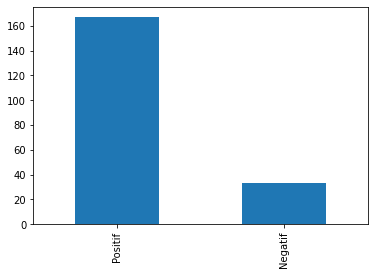

In [ ]:
df['sentimen'].value_counts().plot(kind='bar');

In [ ]:
df.shape

(200, 3)

In [ ]:
add = pd.DataFrame(df['content'])
df['content']= add.replace(to_replace =['yg','yuk','engga','oke','iya','dengan','dapat','ga','dan',
                    'hallo','yo','wes','nya','aja','cok','anjir','kak','ayo','ini','coba','lain','untuk','ada',
                                        'gw','kode','referal','refferal','saya','aku','ya','gak','bisa','mau','kamu','tidak','kalo','kalau','lagi','jadi','bisa','di','dong'],  
                            value ="", regex= True) 
df['content']

0                                    ribet banget proses
1      lan  jelek proses jelek lama ber hari hari uda...
2       kasih bintang dulu mohon  tingkat  kualitas a...
3      kecewa  admin lan kurang bagus  help desk slow...
4      cair a  lama  tingkat  buat cair a biar order ...
                             ...                        
195    gua udh nba aman banget guys nabung s  alhamdu...
196    baik  perca anda  guna   atau saat awal daftar...
197    sekarang  masuk app susah terang koneksi    st...
198    apakah cair a harus lebih dari k  jual produk ...
199    proses lama  cair a masuk ke rekening menng te...
Name: content, Length: 200, dtype: object

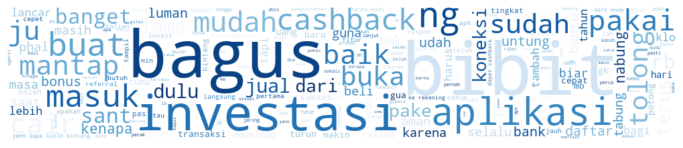

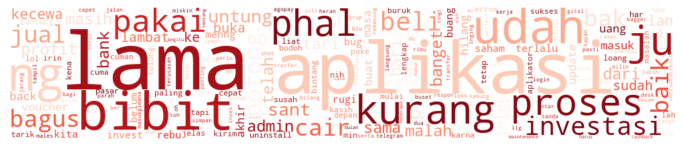

In [ ]:
#menampilkan wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#positif 
train_positif = df[df['sentimen']== 'Positif']
all_text_positif = ' '.join(word for word in train_positif['content'])
wordcloud = WordCloud(colormap='Blues', width = 1000, mode= 'RGBA', background_color = 'white').generate(all_text_positif)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

#negatif
train_negatif = df[df['sentimen']== 'Negatif']
all_text_negatif = ' '.join(word for word in train_negatif['content'])
wordcloud = WordCloud(colormap='Reds', width = 1000, mode= 'RGBA', background_color = 'white').generate(all_text_negatif)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()


In [ ]:
all_text = ' '.join(word for word in df['content'])
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(all_text)

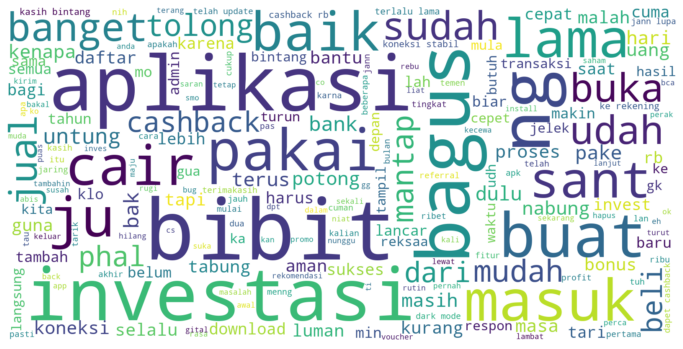

In [ ]:
plt.figure(figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [ ]:
#pembagian data latih dan data uji
from sklearn.model_selection import train_test_split

x = df['content'] #latih
y = df['sentimen'] #uji

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3) #sample

In [ ]:
#vectorisasi
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer()

In [ ]:
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(140, 586)
(60, 586)


In [ ]:
#proses SVM
#library LinearSVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01,0.05,0.25,0.5,1]:
  svm = LinearSVC(C=c)
  #fit model berdasarkan data training
  svm.fit(x_train, y_train)

  print('Akurasi untuk C = %s: %s' %(c, accuracy_score(y_test, svm.predict(x_test))))

Akurasi untuk C = 0.01: 0.8
Akurasi untuk C = 0.05: 0.8333333333333334
Akurasi untuk C = 0.25: 0.8833333333333333
Akurasi untuk C = 0.5: 0.8833333333333333
Akurasi untuk C = 1: 0.8833333333333333


In [ ]:
#proses SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01,0.05,0.25,0.5,1]:
  svm = LinearSVC(C=c)
  svm.fit(x_test, y_test)
  print('Akurasi untuk C = %s: %s' %(c, accuracy_score(y_train, svm.predict(x_train))))

Akurasi untuk C = 0.01: 0.8428571428571429
Akurasi untuk C = 0.05: 0.85
Akurasi untuk C = 0.25: 0.8285714285714286
Akurasi untuk C = 0.5: 0.8285714285714286
Akurasi untuk C = 1: 0.8285714285714286


In [ ]:
#final metode svm
svm = LinearSVC(C = 0.5)
svm.fit(x_train, y_train) 

LinearSVC(C=0.5)

In [ ]:
print('Final Model SVM akurasi: %s' %accuracy_score (y_test,svm.predict(x_test)))

Final Model SVM akurasi: 0.8833333333333333


In [ ]:
from scipy.sparse.sputils import matrix
#evaluasi model svm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_predd = svm.predict(x_test)
print('Akurasi of SVM classifier on test set: (:.2f)'.format(svm.score(x_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_predd)
print(confusion_matrix)
print(classification_report(y_test, y_predd))

Akurasi of SVM classifier on test set: (:.2f)
[[ 5  7]
 [ 0 48]]
              precision    recall  f1-score   support

     Negatif       1.00      0.42      0.59        12
     Positif       0.87      1.00      0.93        48

    accuracy                           0.88        60
   macro avg       0.94      0.71      0.76        60
weighted avg       0.90      0.88      0.86        60



In [ ]:
from scipy.sparse.sputils import matrix
#evaluasi model svm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_predd = svm.predict(x_train)
print('Akurasi of SVM classifier on train set: (:.2f)'.format(svm.score(x_train, y_train)))
confusion_matrix = confusion_matrix(y_train, y_predd)
print(confusion_matrix)
print(classification_report(y_train, y_predd))

Akurasi of SVM classifier on train set: (:.2f)
[[ 21   0]
 [  0 119]]
              precision    recall  f1-score   support

     Negatif       1.00      1.00      1.00        21
     Positif       1.00      1.00      1.00       119

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

